In [1]:
%store -r store_family_list

In [2]:
import functions
import pandas as pd
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [3]:
hyperparameters = {
    "in_length" : 30,
    "n_estimators" : 500,
    "max_depth" : 15,
    "subsample" : 0.5,
    "min_child_weight" : 1,
    "learning_rate" : 0.05,
    "subsample" : 0.5,
    "min_child_weight" : 5,
    "objective" : "reg:squarederror",
    "tree_method" : "hist",
    "colsample_bytree" : 0.6,
    "gamma" : 0.1
    }

We load necessary packages and functions that will be used

In [4]:
df = pd.read_csv("data/train.csv")
df_w = functions.winsorize_by_group(df, ['store_nbr', 'family'], 'sales', 0.005, 0.005)

In [6]:
df

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
1111435,2017-08-15,9,POULTRY,438.133,0
1111436,2017-08-15,9,PREPARED FOODS,154.553,1
1111437,2017-08-15,9,PRODUCE,2419.729,148
1111438,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


We can see that the data spans from 2013-01-01 until 2017-08-15 with a couple of different columns. The target variable is the sales column.

In [9]:
df.isnull().values.any()

False

There are no missing data.

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['predicted_sales'] = df.groupby(['store_nbr', 'family'])['sales'].shift(1)
df['predicted_sales'].fillna(0, inplace=True)
rmsle_score = functions.rmsle1617(df, 'predicted_sales')
print("RMSLE:", rmsle_score)

RMSLE: 0.7063659384716767


The RMSLE from the dummy model is 0.706.

In [38]:
start_date = pd.to_datetime('2016-01-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2017-08-15', format='%Y-%m-%d')

forecast_xg = functions.forecaster(df_w, start_date, end_date, store_family_list, hyperparameters)
xg_df = forecast_xg.run_parallel(forecast_xg.f_xg)

Progress: 1/660 (0.15%)
Progress: 2/660 (0.30%)
Progress: 3/660 (0.45%)
Progress: 4/660 (0.61%)
Progress: 5/660 (0.76%)
Progress: 6/660 (0.91%)
Progress: 7/660 (1.06%)
Progress: 8/660 (1.21%)
Progress: 9/660 (1.36%)
Progress: 10/660 (1.52%)
Progress: 11/660 (1.67%)
Progress: 12/660 (1.82%)
Progress: 13/660 (1.97%)
Progress: 14/660 (2.12%)
Progress: 15/660 (2.27%)
Progress: 16/660 (2.42%)
Progress: 17/660 (2.58%)
Progress: 18/660 (2.73%)
Progress: 19/660 (2.88%)
Progress: 20/660 (3.03%)
Progress: 21/660 (3.18%)
Progress: 22/660 (3.33%)
Progress: 23/660 (3.48%)
Progress: 24/660 (3.64%)
Progress: 25/660 (3.79%)
Progress: 26/660 (3.94%)
Progress: 27/660 (4.09%)
Progress: 28/660 (4.24%)
Progress: 29/660 (4.39%)
Progress: 30/660 (4.55%)
Progress: 31/660 (4.70%)
Progress: 32/660 (4.85%)
Progress: 33/660 (5.00%)
Progress: 34/660 (5.15%)
Progress: 35/660 (5.30%)
Progress: 36/660 (5.45%)
Progress: 37/660 (5.61%)
Progress: 38/660 (5.76%)
Progress: 39/660 (5.91%)
Progress: 40/660 (6.06%)
Progress:

Progress: 311/660 (47.12%)
Progress: 312/660 (47.27%)
Progress: 313/660 (47.42%)
Progress: 314/660 (47.58%)
Progress: 315/660 (47.73%)
Progress: 316/660 (47.88%)
Progress: 317/660 (48.03%)
Progress: 318/660 (48.18%)
Progress: 319/660 (48.33%)
Progress: 320/660 (48.48%)
Progress: 321/660 (48.64%)
Progress: 322/660 (48.79%)
Progress: 323/660 (48.94%)
Progress: 324/660 (49.09%)
Progress: 325/660 (49.24%)
Progress: 326/660 (49.39%)
Progress: 327/660 (49.55%)
Progress: 328/660 (49.70%)
Progress: 329/660 (49.85%)
Progress: 330/660 (50.00%)
Progress: 331/660 (50.15%)
Progress: 332/660 (50.30%)
Progress: 333/660 (50.45%)
Progress: 334/660 (50.61%)
Progress: 335/660 (50.76%)
Progress: 336/660 (50.91%)
Progress: 337/660 (51.06%)
Progress: 338/660 (51.21%)
Progress: 339/660 (51.36%)
Progress: 340/660 (51.52%)
Progress: 341/660 (51.67%)
Progress: 342/660 (51.82%)
Progress: 343/660 (51.97%)
Progress: 344/660 (52.12%)
Progress: 345/660 (52.27%)
Progress: 346/660 (52.42%)
Progress: 347/660 (52.58%)
P

Progress: 615/660 (93.18%)
Progress: 616/660 (93.33%)
Progress: 617/660 (93.48%)
Progress: 618/660 (93.64%)
Progress: 619/660 (93.79%)
Progress: 620/660 (93.94%)
Progress: 621/660 (94.09%)
Progress: 622/660 (94.24%)
Progress: 623/660 (94.39%)
Progress: 624/660 (94.55%)
Progress: 625/660 (94.70%)
Progress: 626/660 (94.85%)
Progress: 627/660 (95.00%)
Progress: 628/660 (95.15%)
Progress: 629/660 (95.30%)
Progress: 630/660 (95.45%)
Progress: 631/660 (95.61%)
Progress: 632/660 (95.76%)
Progress: 633/660 (95.91%)
Progress: 634/660 (96.06%)
Progress: 635/660 (96.21%)
Progress: 636/660 (96.36%)
Progress: 637/660 (96.52%)
Progress: 638/660 (96.67%)
Progress: 639/660 (96.82%)
Progress: 640/660 (96.97%)
Progress: 641/660 (97.12%)
Progress: 642/660 (97.27%)
Progress: 643/660 (97.42%)
Progress: 644/660 (97.58%)
Progress: 645/660 (97.73%)
Progress: 646/660 (97.88%)
Progress: 647/660 (98.03%)
Progress: 648/660 (98.18%)
Progress: 649/660 (98.33%)
Progress: 650/660 (98.48%)
Progress: 651/660 (98.64%)
P

In [39]:
# ALL
xg_df['date'] = pd.to_datetime(xg_df['date'])
df_w['date'] = pd.to_datetime(df_w['date'])
merged_df = pd.merge(df_w, xg_df, on=['date', 'store_nbr', 'family'])
rmsle_score = functions.rmsle1617(merged_df, 'yhat')
print("RMSLE:", rmsle_score)

RMSLE: 0.6876986833071943


/Users/jaichung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
xg_df0 = xg_df
xg_df0['yhat'] = xg_df0['yhat'].apply(lambda x: 0 if x < 0 else x)
merged_df_0 = pd.merge(df_w, xg_df0, on=['date', 'store_nbr', 'family'])
rmsle_score = functions.rmsle1617(merged_df_0, 'yhat')
print("RMSLE:", rmsle_score)

RMSLE: 0.6917785714749302


In [55]:
f_merged_df = pd.merge(merged_df, df[['date', 'store_nbr', 'family', 'predicted_sales']], 
                       on=['date', 'store_nbr', 'family'])

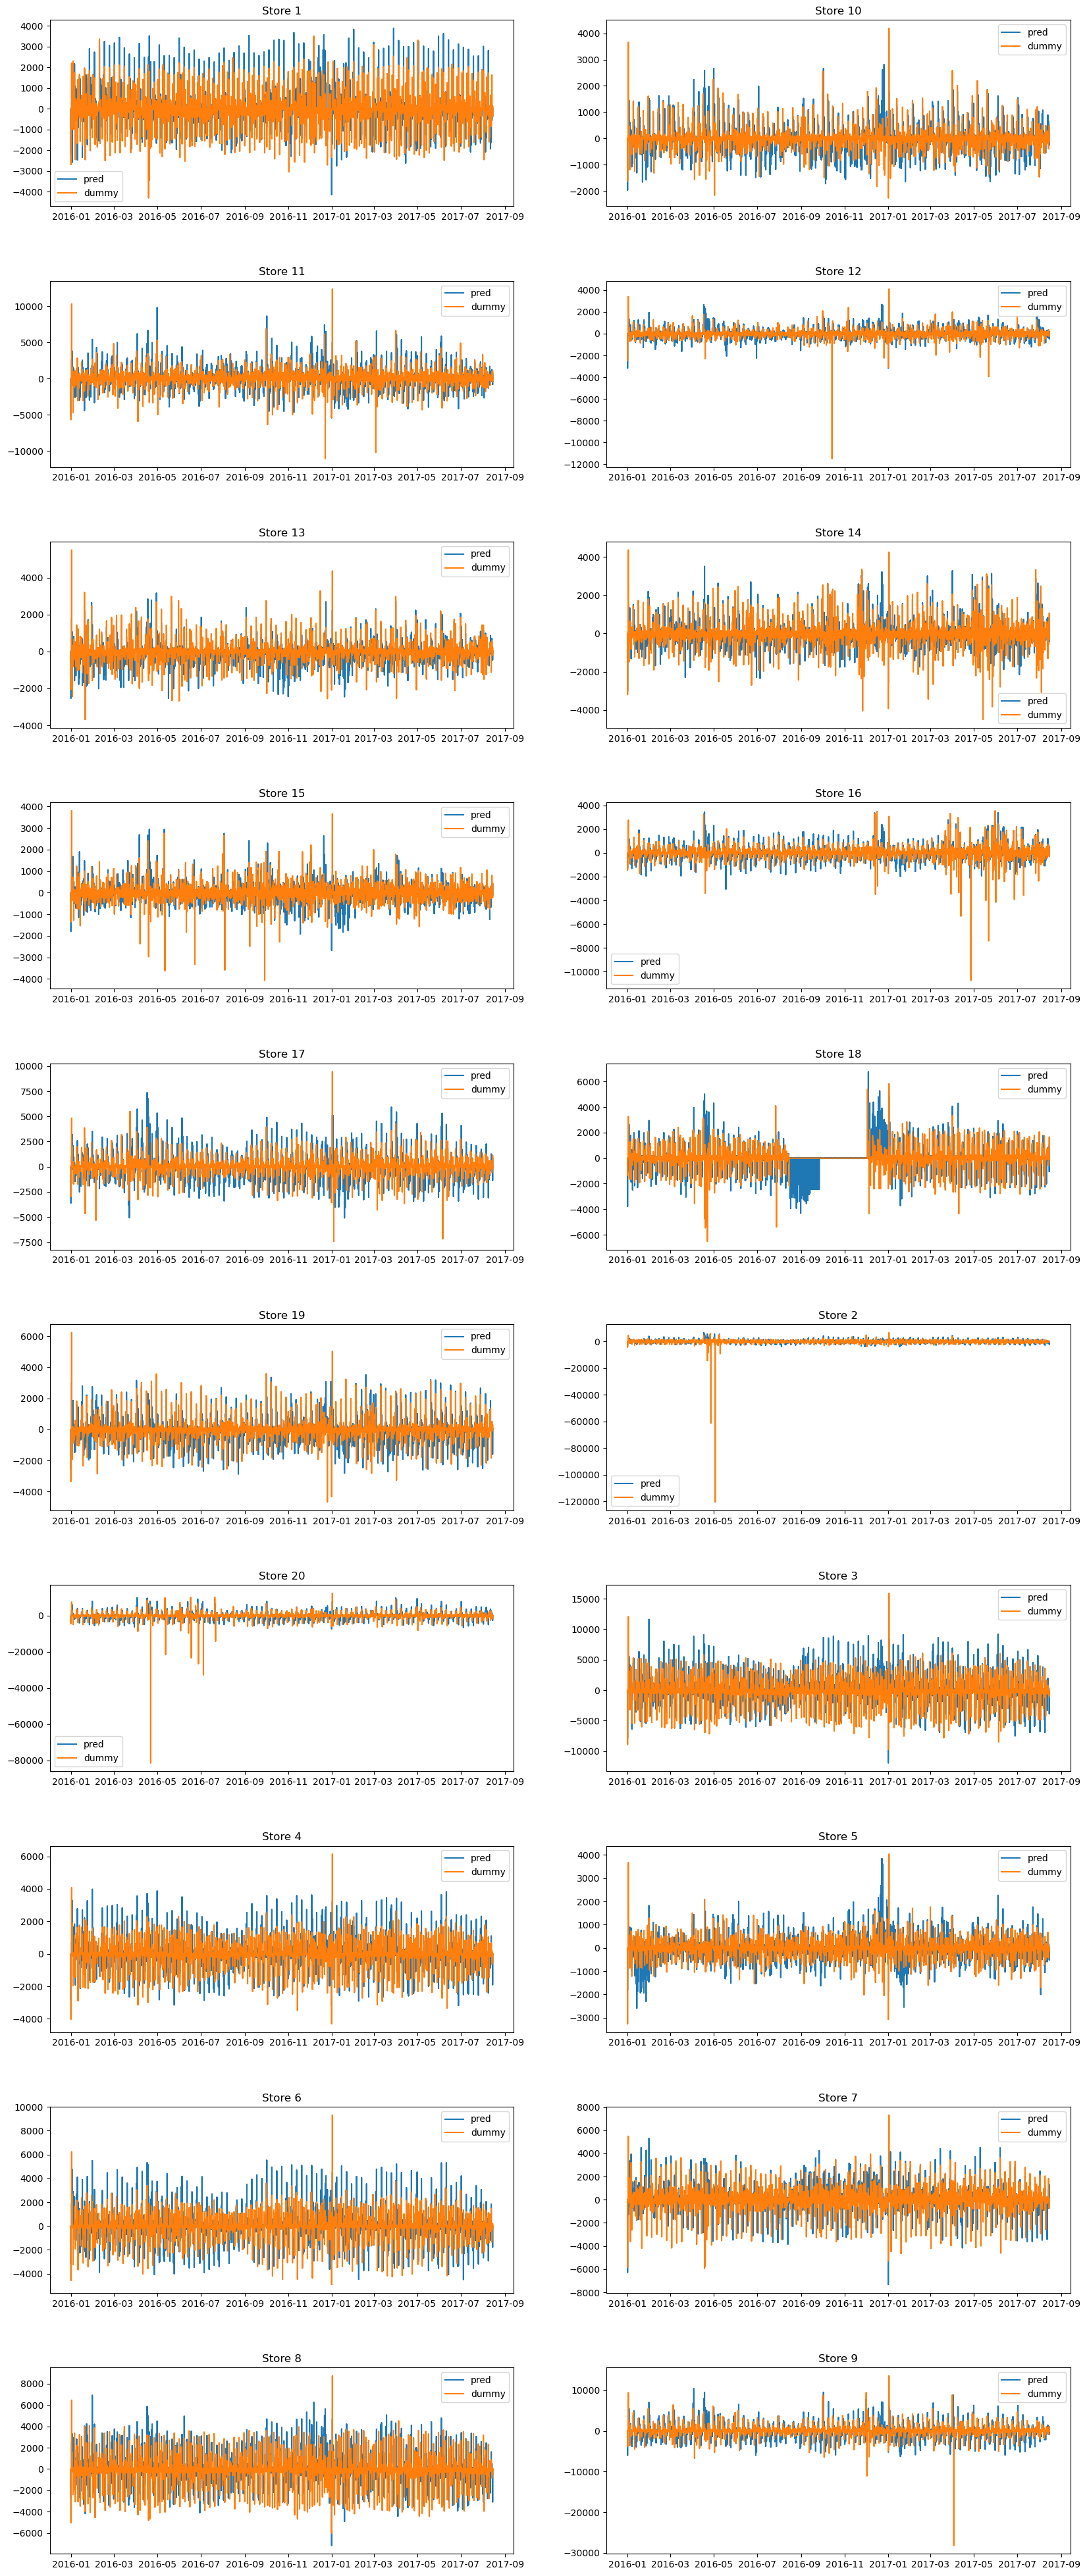

In [57]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20, 50))

for i, store_nbr in enumerate(f_merged_df['store_nbr'].unique()):
    store_data = f_merged_df[f_merged_df['store_nbr'] == store_nbr]
    store_data.loc[:,'residuals'] = store_data['sales'] - store_data['yhat']
    store_data.loc[:,'residuals_dummy'] = store_data['sales'] - store_data['predicted_sales']
    ax = axs[i // 2, i % 2]
    
    ax.plot(store_data['date'], store_data['residuals'], label='pred')
    ax.plot(store_data['date'], store_data['residuals_dummy'], label='dummy')
    
    ax.set_title('Store {}'.format(store_nbr))
    ax.legend()
    
plt.subplots_adjust(hspace=0.4)
plt.show()

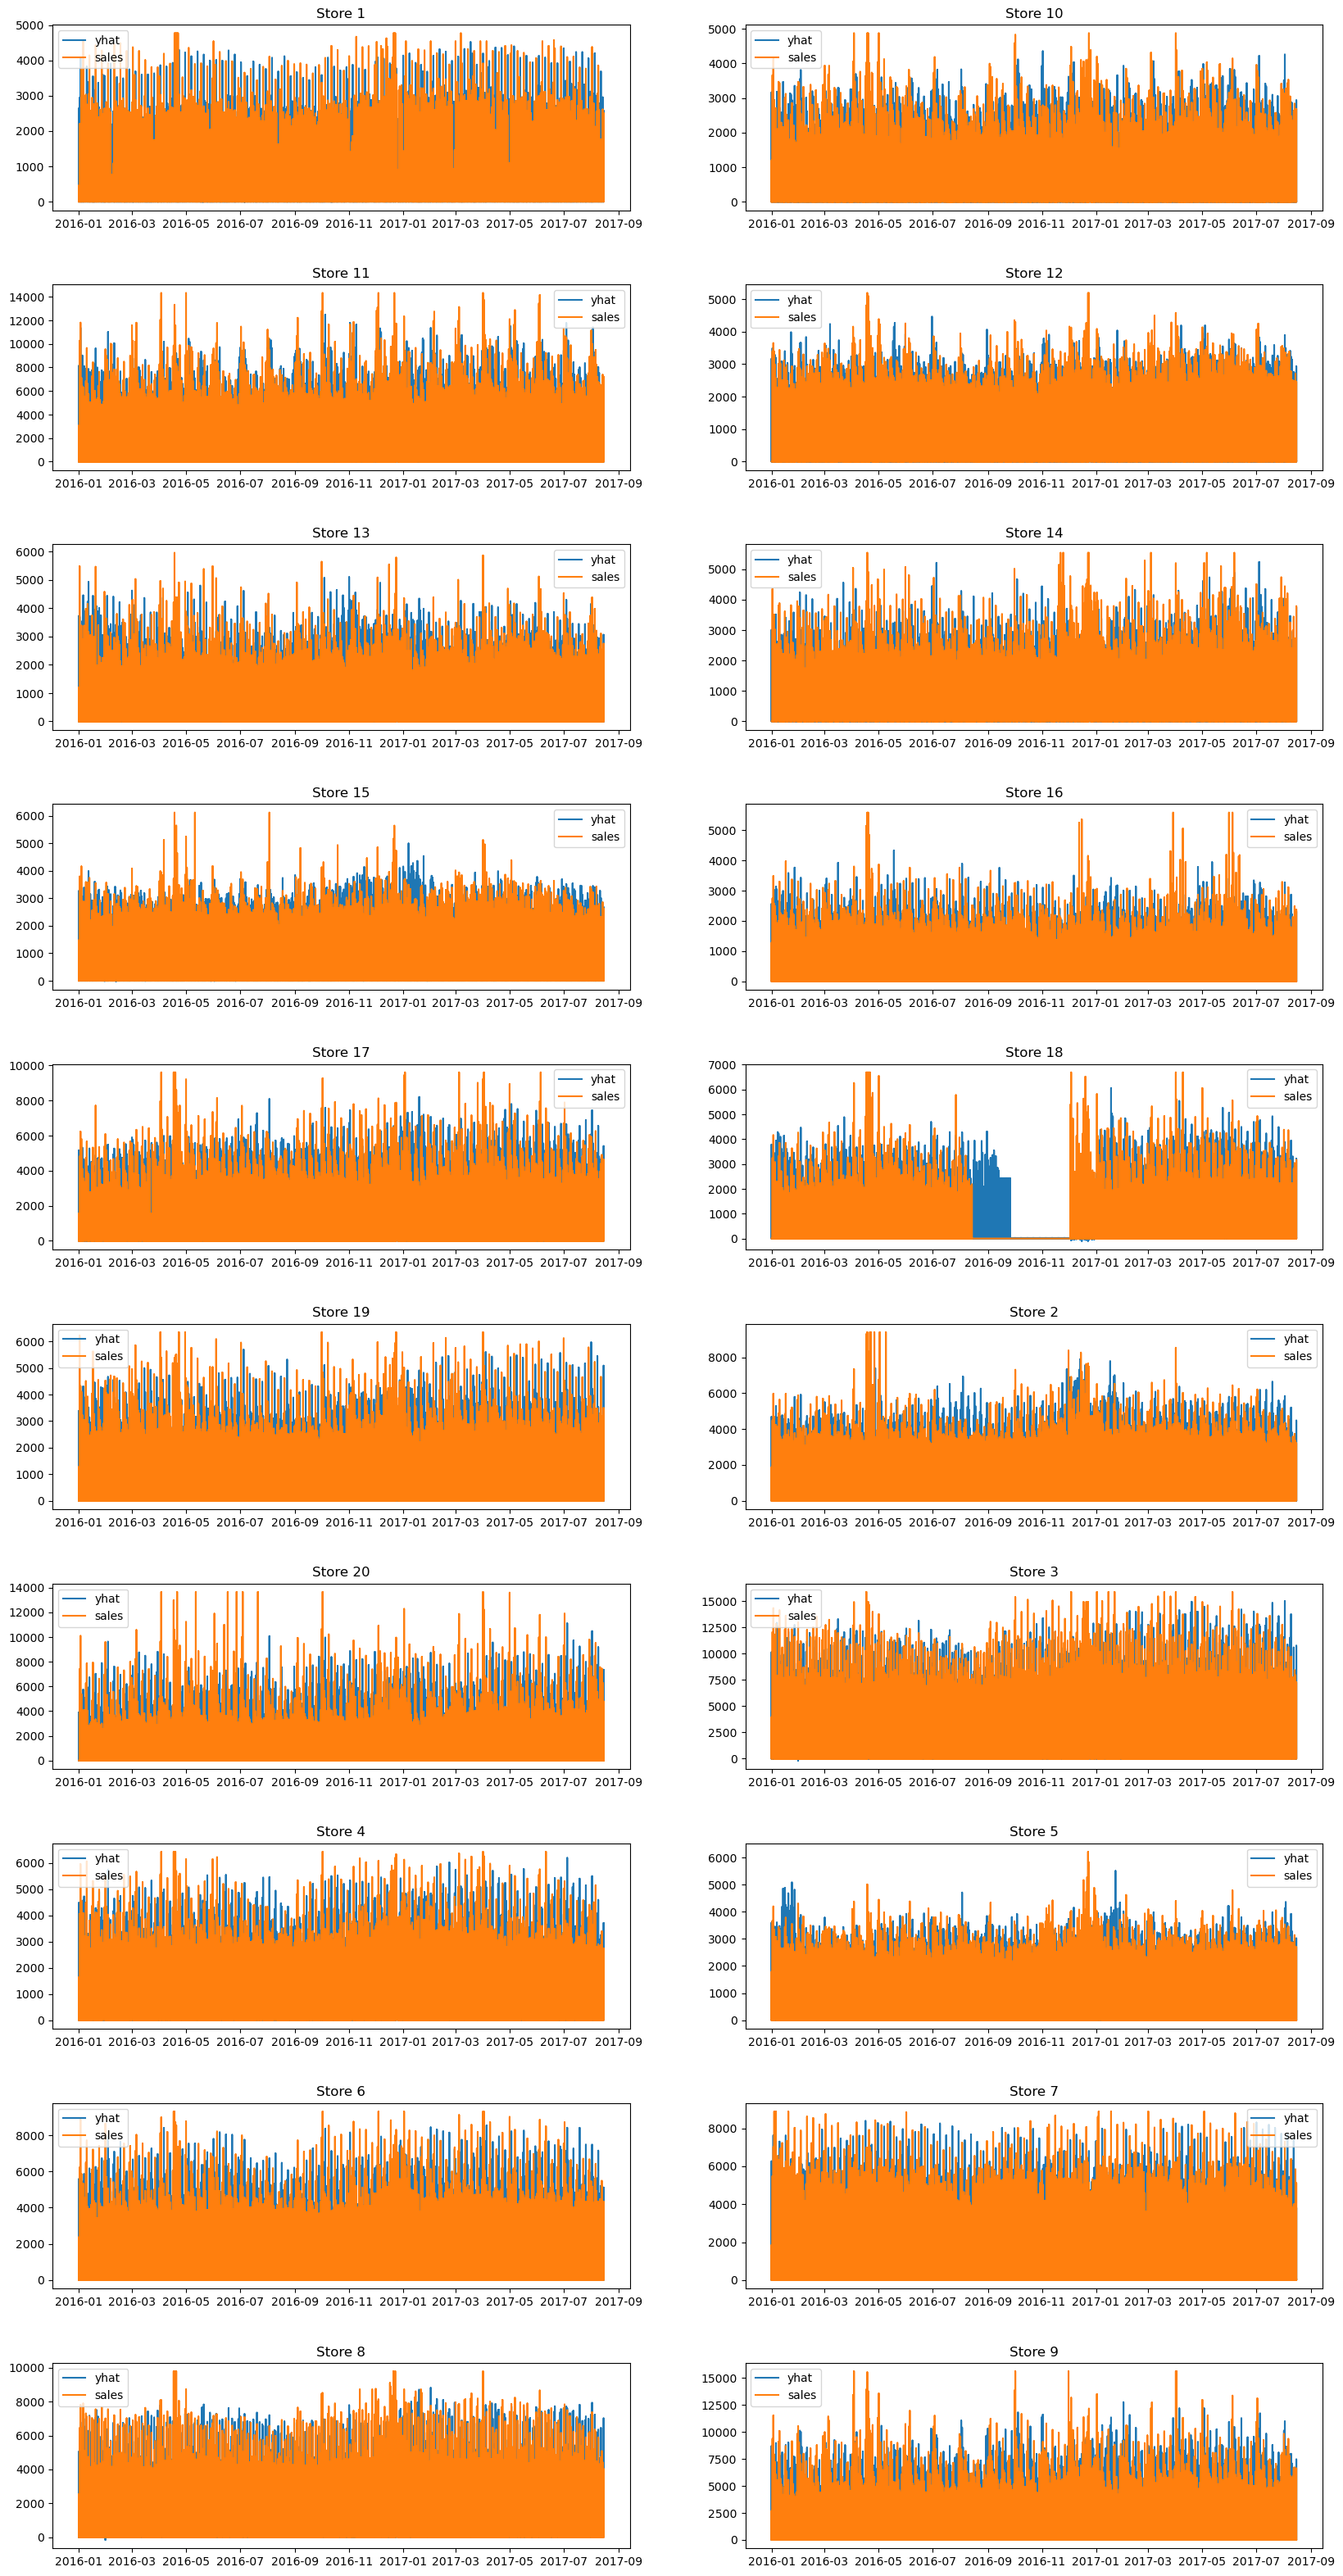

In [45]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20, 40))

for i, store_nbr in enumerate(merged_df['store_nbr'].unique()):
    store_data = merged_df[merged_df['store_nbr'] == store_nbr]
    
    ax = axs[i // 2, i % 2]
    
    ax.plot(store_data['date'], store_data['yhat'], label='yhat')
    ax.plot(store_data['date'], store_data['sales'], label='sales')
    
    ax.set_title('Store {}'.format(store_nbr))
    ax.legend()
    
plt.subplots_adjust(hspace=0.4)
plt.show()

In [25]:
merged_df['diff'] = merged_df['yhat'] - merged_df['sales']
merged_df.sort_values('diff', ascending = False)[0:50]

,date,store_nbr,family,sales,onpromotion,yhat,diff
241359,2017-01-01,3,PRODUCE,0.000,0,11911.449219,11911.449219
459,2016-01-01,3,PRODUCE,0.000,0,7856.447266,7856.447266
358812,2017-06-28,3,BEVERAGES,6516.000,32,14006.827148,7490.827148
241491,2017-01-01,7,PRODUCE,0.000,0,7318.923828,7318.923828
241308,2017-01-01,20,GROCERY I,0.000,0,7192.421387,7192.421387
241524,2017-01-01,8,PRODUCE,0.000,0,7147.248535,7147.248535
372672,2017-07-19,3,BEVERAGES,7893.000,52,14820.528320,6927.528320
386532,2017-08-09,3,BEVERAGES,6825.000,11,13745.932617,6920.932617
288852,2017-03-14,3,BEVERAGES,6906.000,32,13796.724609,6890.724609
312612,2017-04-19,3,BEVERAGES,8051.000,30,14938.893555,6887.893555
